In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [31]:
dataset.drop(columns=['Genre','Age','CustomerID'],inplace=True)

In [35]:
X = dataset.iloc[:,:2].values

### Elbow Curve

**Find the optimal number of clusters**

In [40]:
from sklearn.cluster import KMeans

In [42]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print(wcss)

[269981.28, 183653.32894736837, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37455.984555160285, 33662.49190020506, 24986.52564064288, 23258.513757611494, 20114.097098312315]


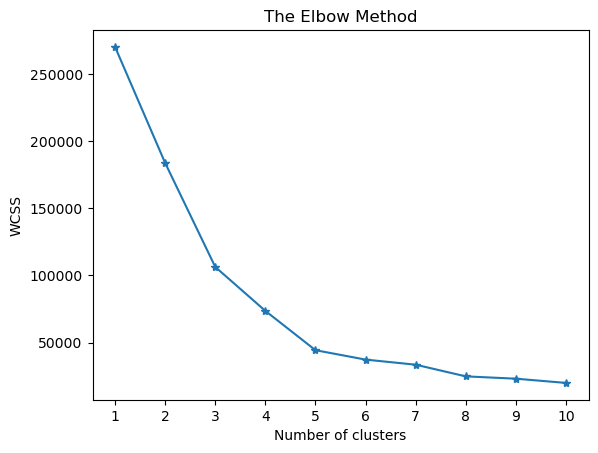

In [48]:
plt.plot(range(1,11),wcss,marker='*')
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**K-Means Model**

In [51]:
kmeans = KMeans(n_clusters=5,init='k-means++')

In [53]:
# Predict
y_kmeans = kmeans.fit_predict(X)

In [55]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [57]:
dataset['Cluster'] = pd.DataFrame(y_kmeans)
dataset.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


**Visualising the clusters**

**Before clustering**

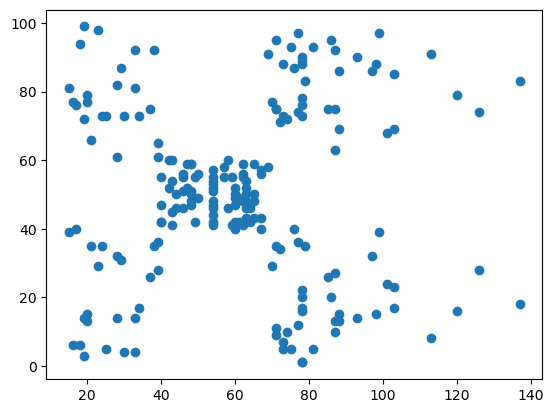

In [61]:
a = dataset.iloc[:,0]
b = dataset.iloc[:,1]

plt.scatter(a,b)
plt.show()

**After Clustering**

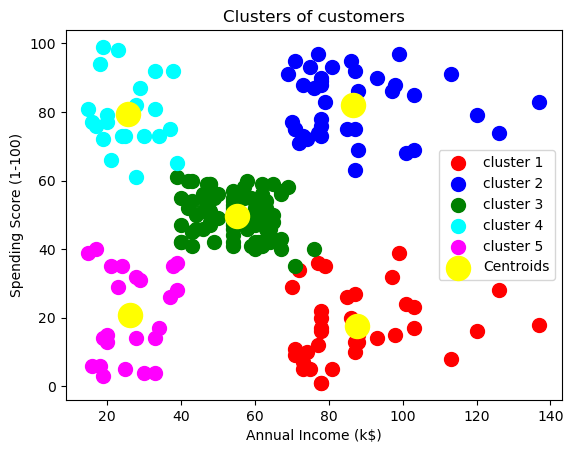

In [66]:
plt.scatter(X[y_kmeans == 0, 0],X[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'cluster 1')

plt.scatter(X[y_kmeans == 1, 0],X[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'cluster 2')

plt.scatter(X[y_kmeans == 2, 0],X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'cluster 3')

plt.scatter(X[y_kmeans == 3, 0],X[y_kmeans == 3, 1],
            s = 100, c = 'cyan', label = 'cluster 4')

plt.scatter(X[y_kmeans == 4, 0],X[y_kmeans == 4, 1],
            s = 100, c = 'magenta', label = 'cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Clustering Observation**

**Check Clusters**

- High Income, High Spending Score(Cluster 5)- Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.
- High Income, Low Spending Score(Cluster 3) - Target these customers by asking the feedback and advertising the product in a better way to convert them into cluster-5 customers.
- Average Income